In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df = pd.read_csv('full_results.csv')
df = df.groupby(['data', 'model', 'attack', 'adv_param', 'defence'], as_index=False).agg({
        'acc_on_adv': ['mean'],
        'fpr': ['mean']
})
df.columns = [x[0] for x in df.columns]
df.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
0,banknote,dnn,apgd,0.05,baard,0.903750,0.008081
1,banknote,dnn,apgd,0.05,lid,0.851955,0.044257
2,banknote,dnn,apgd,0.05,magnet,0.676410,0.003030
3,banknote,dnn,apgd,0.05,rc,0.732146,0.003035
4,banknote,dnn,apgd,0.10,baard,0.637552,0.008081


In [3]:
data = df[(df['data'] == 'mnist') | (df['data'] == 'cifar10')]

In [4]:
data.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
286,cifar10,resnet,apgd,0.031,baard,0.1554,0.0588
287,cifar10,resnet,apgd,0.031,fs,0.8940,0.0602
288,cifar10,resnet,apgd,0.031,lid,0.0310,0.0118
289,cifar10,resnet,apgd,0.031,magnet,0.2158,0.0020
290,cifar10,resnet,apgd,0.031,rc,0.0012,0.0030


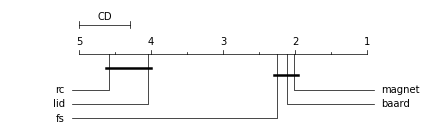

In [5]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

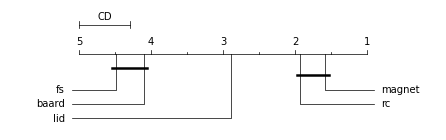

In [6]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Numeric dataset - DNN

In [7]:
data = df[(df['data'] != 'mnist') & (df['model'] == 'dnn')]
data.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
0,banknote,dnn,apgd,0.05,baard,0.903750,0.008081
1,banknote,dnn,apgd,0.05,lid,0.851955,0.044257
2,banknote,dnn,apgd,0.05,magnet,0.676410,0.003030
3,banknote,dnn,apgd,0.05,rc,0.732146,0.003035
4,banknote,dnn,apgd,0.10,baard,0.637552,0.008081


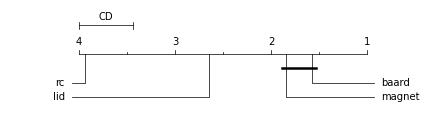

In [8]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_num_dnn.pdf', format='pdf', dpi=1200, bbox_inches='tight')

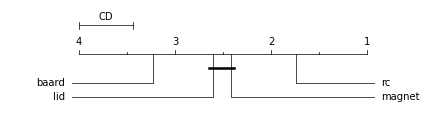

In [9]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_num_dnn.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Numeric - SVM and Tree

In [10]:
data = df[(df['model'] == 'svm') | (df['model'] == 'tree')]
data.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
92,banknote,svm,bim,0.05,baard,0.954055,0.011240
93,banknote,svm,bim,0.05,magnet,0.615945,0.001020
94,banknote,svm,bim,0.05,rc,0.819231,0.002041
95,banknote,svm,bim,0.10,baard,0.686452,0.011240
96,banknote,svm,bim,0.10,magnet,0.577091,0.001020


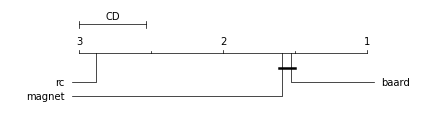

In [11]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_num_svm_tree.pdf', format='pdf', dpi=1200, bbox_inches='tight')

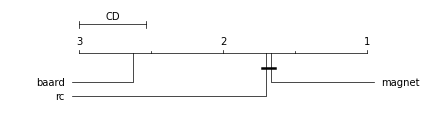

In [12]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_num_svm_tree.pdf', format='pdf', dpi=1200, bbox_inches='tight')